In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv(r'C:\Users\CSC\Documents\Portfolio\Retail Analytics\data_raw\Sample_ Superstore.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Ship Date     9994 non-null   object 
 4   Ship Mode     9994 non-null   object 
 5   Customer ID   9994 non-null   object 
 6   Segment       9994 non-null   object 
 7   Country       9994 non-null   object 
 8   City          9994 non-null   object 
 9   State         9994 non-null   object 
 10  Region        9994 non-null   object 
 11  Product ID    9994 non-null   object 
 12  Category      9994 non-null   object 
 13  Sub-Category  9994 non-null   object 
 14  Product Name  9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [5]:
data.isnull().sum()

Row ID          0
Order ID        0
Order Date      0
Ship Date       0
Ship Mode       0
Customer ID     0
Segment         0
Country         0
City            0
State           0
Region          0
Product ID      0
Category        0
Sub-Category    0
Product Name    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data['Order Date']=pd.to_datetime(data['Order Date'],format='mixed')
data['Ship Date']=pd.to_datetime(data['Ship Date'],format='mixed')

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Segment        9994 non-null   object        
 7   Country        9994 non-null   object        
 8   City           9994 non-null   object        
 9   State          9994 non-null   object        
 10  Region         9994 non-null   object        
 11  Product ID     9994 non-null   object        
 12  Category       9994 non-null   object        
 13  Sub-Category   9994 non-null   object        
 14  Product Name   9994 non-null   object        
 15  Sales          9994 n

In [12]:
data.duplicated().sum()

0

In [15]:
data['Order Month']=data['Order Date'].dt.month_name()
data['Order Year']=data['Order Date'].dt.year
data['Profit Margin']=data['Profit']/data['Sales']

In [52]:
category_wise_sales=data.groupby('Category')['Sales'].sum()

In [51]:
category_wise_profit=data.groupby('Category')['Profit'].sum()

In [50]:
region_wise_sales=data.groupby('Region')['Sales'].sum()

In [49]:
region_wise_profit=data.groupby('Region')['Profit'].sum()

In [29]:
data.groupby(['Region','Category']).agg({'Sales':['sum','mean'],'Profit':['sum','mean']})

Sales                  Profit           
                                 sum        mean         sum       mean
Region  Category                                                       
Central Furniture        163797.1638  340.534644  -2871.0494  -5.968918
        Office Supplies  167026.4150  117.458801   8879.9799   6.244712
        Technology       170416.3120  405.753124  33697.4320  80.231981
East    Furniture        208291.2040  346.574383   3046.1658   5.068496
        Office Supplies  205516.0550  120.044425  41014.5791  23.957114
        Technology       264973.9810  495.278469  47462.0351  88.714084
South   Furniture        117298.6840  353.309289   6771.2061  20.395199
        Office Supplies  125651.3130  126.282727  19986.3928  20.086827
        Technology       148771.9080  507.753952  19991.8314  68.231506
West    Furniture        252612.7435  357.302325  11504.9503  16.272914
        Office Supplies  220853.2490  116.422377  52609.8490  27.733183
        Technology       251991.8320  420.687533  44303.6496  73.962687

In [53]:
top_products=data.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

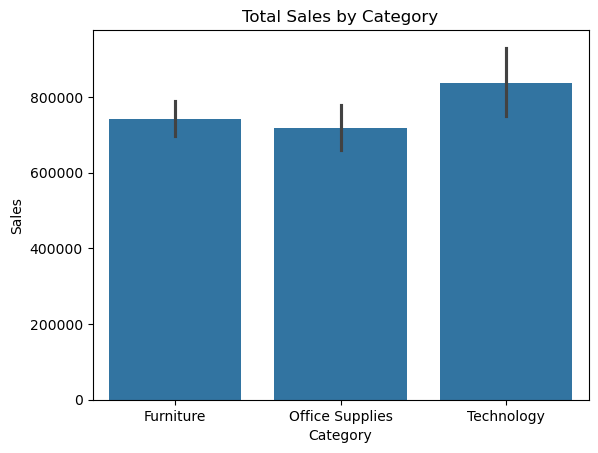

In [35]:
sns.barplot(data=data,x='Category',y='Sales',estimator='sum')
plt.title('Total Sales by Category')
plt.show()

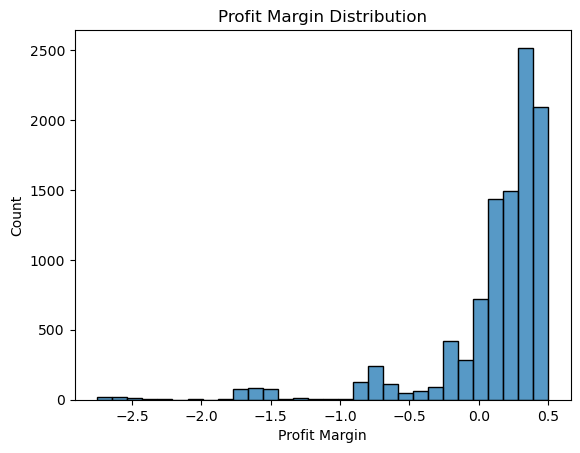

In [38]:
sns.histplot(data['Profit Margin'],bins=30)
plt.title('Profit Margin Distribution')
plt.show()

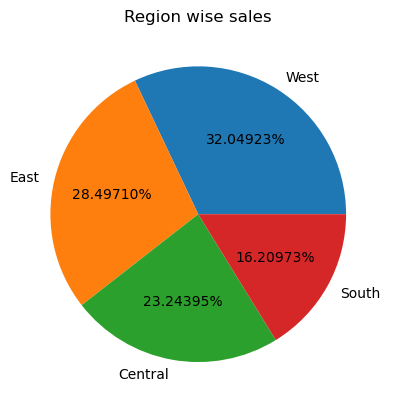

In [47]:
x=data['Region'].value_counts().index
y=data['Region'].value_counts().values

plt.pie(y,labels=x,autopct='%0.5f%%')
plt.title('Region wise sales')
plt.show()

In [48]:
data.to_csv('superstore_cleaned.csv', index=False)
category_wise_sales.to_csv('category_wise_sales',index=False)
category_wise_profit.to_csv('category_wise_profit',index=False)
region_wise_sales.to_csv('region_wise_sales',index=False)
region_wise_profit.to_csv('region_wise_profit',index=False)
top_products.to_csv('top_products',index=False)